**Augmented Dicky-Fuller Test for Stationarity in the Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_daily = pd.read_csv("DailyEnergyConsumption_df.csv").set_index("Datetime")
df_daily.head()


,Total_MW,Week
Datetime,,
2012-01-01,46188.163043,52
2012-01-02,53148.583333,1
2012-01-03,62387.958333,1
2012-01-04,62386.708333,1
2012-01-05,56627.500000,1


In [2]:
df_weekly = pd.read_csv("WeekyEnergyConsumption_df.csv").set_index("Datetime")
df_weekly.head()

,Total_MW,Weeks
Datetime,,
2012-01-01,46188.163043,1
2012-01-08,54688.875000,2
2012-01-15,55755.767857,3
2012-01-22,57336.458333,4
2012-01-29,53328.892857,5


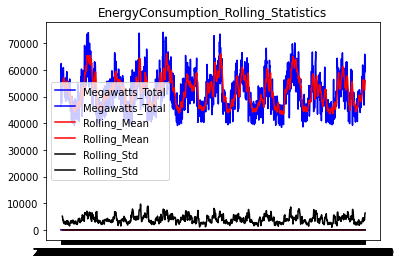

Result: Dicky-Fuller Test
Test Statistics                  -4.372127
p-value                           0.000332
No. of lags used                 26.000000
Number of observations used    2165.000000
critical value (1%)              -3.433374
critical value (5%)              -2.862876
critical value (10%)             -2.567481
dtype: float64


<Figure size 432x288 with 0 Axes>

In [4]:
#Augemented Dickey-Fuller Test: daily summed dataset: df_daily
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #plot rolling stats
    plt.plot(timeseries, color='blue', label = "Megawatts_Total")
    plt.plot(rolmean, color='red',label='Rolling_Mean')
    plt.plot(rolstd, color="black", label='Rolling_Std')
    plt.legend(loc='best')
    plt.title("EnergyConsumption_Rolling_Statistics")
    plt.show(block=False)
    plt.savefig("EnergyConsumption_Rolling_Stats.png")
    
    #Dicky-Fuller Test
    print("Result: Dicky-Fuller Test")
    adft = adfuller(df_daily.Total_MW, autolag="AIC")
    output = pd.Series(adft[0:4], index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)
test_stationarity(df_daily)

**Daily Mean Megawatts**

*p-value <0.05*

*Test Stat (-4.37) < critical values (1% (-3.43),5% (-2.86),10% (-2.57))*

*Therefore: reject the null-hypothesis and support stationarity*

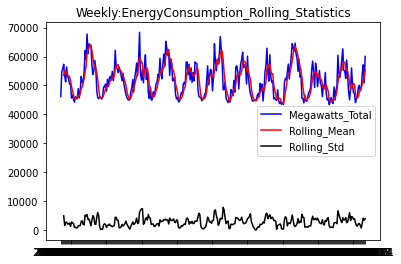

Result: Dicky-Fuller Test
Test Statistics               -8.085169e+00
p-value                        1.426286e-12
No. of lags used               1.100000e+01
Number of observations used    3.020000e+02
critical value (1%)           -3.452190e+00
critical value (5%)           -2.871158e+00
critical value (10%)          -2.571895e+00
dtype: float64


<Figure size 432x288 with 0 Axes>

In [6]:
#Augemented Dickey-Fuller Test: weekly summed dataset: df_weekly
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()
    
    #plot rolling stats
    plt.plot(timeseries, color='blue', label = "Megawatts_Total")
    plt.plot(rolmean, color='red',label='Rolling_Mean')
    plt.plot(rolstd, color="black", label='Rolling_Std')
    plt.legend(loc='best')
    plt.title("Weekly:EnergyConsumption_Rolling_Statistics")
    plt.show(block=False)
    plt.savefig("Weekly:EnergyConsumption_Rolling_Stats.png")
    
    #Dicky-Fuller Test
    print("Result: Dicky-Fuller Test")
    adft = adfuller(df_weekly.Total_MW, autolag="AIC")
    output = pd.Series(adft[0:4], index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)
test_stationarity(df_weekly.Total_MW)

**Daily Mean Megawatts**

*p-value < 0.05 (even smaller)*

*Test Statistic smaller than all critical values*

*Further support for stationarity when resampled at the weekly level compared to the daily level*